<a href="https://colab.research.google.com/github/Jwavely/Google-Colaboratory/blob/main/boston_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

특정한 입력변수값을 사용하여 출력변수의 값을 계산하는 것을 예측(prediction)문제라고 한다. 예측문제 중에서 출력변수의 값이 연속값인 문제를 회귀(regression) 문제라고 한다.

보스턴 집값 예측

sklearn 패키지의 datasets 서브패키지는 회귀분석을 공부하기 위한 예제를 제공한다. 그 중 load_boston() 명령으로 받을 수 있는 보스턴 주택 가격 데이터는 다음과 같은 데이터이다. 보스턴의 506개 타운(town)의 13개 독립변수값로부터 해당 타운의 주택가격 중앙값을 예측하는 문제다. 사용할 수 있는 특징 데이터는 다음과 같다.

* **독립변수** 
 * `CRIM`: 범죄율
 * `INDUS`: 비소매상업지역 면적 비율
 * `NOX`: 일산화질소 농도 
 * `RM`: 주택당 방 수
 * `LSTAT`: 인구 중 하위 계층 비율
 * `B`: 인구 중 흑인 비율
 * `PTRATIO`: 학생/교사 비율
 * `ZN`: 25,000 평방피트를 초과 거주지역 비율
 * `CHAS`: 찰스강의 경계에 위치한 경우는 1, 아니면 0
 * `AGE`: 1940년 이전에 건축된 주택의 비율
 * `RAD`: 방사형 고속도로까지의 거리
 * `DIS`: 직업센터의 거리
 * `TAX`:	재산세율
 
* **종속변수**
 * 보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import datasets
housing = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
dir(housing)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [5]:
data = pd.DataFrame(housing['data'],columns=housing['feature_names'])
target = pd.DataFrame(housing['target'],columns=['Target'])

In [6]:
print(data.shape)
print(target.shape)

(506, 13)
(506, 1)


In [7]:
df = pd.concat([data,target],axis = 1)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [8]:
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  Target  
0       15.3  396.90   4.98  

In [9]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

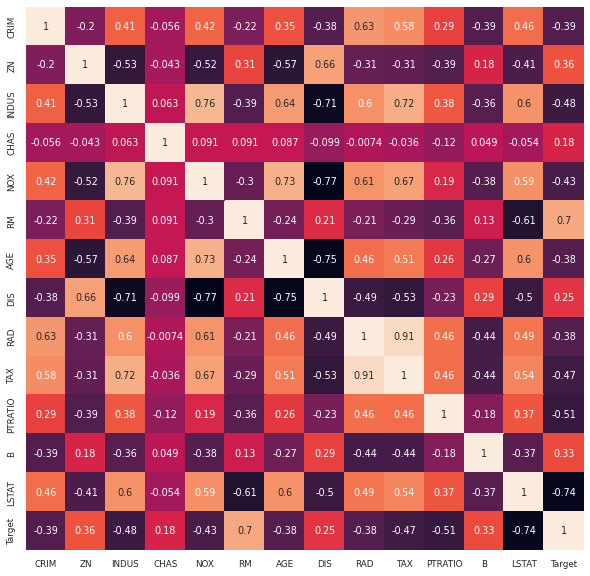

In [10]:
#상관 관계 분석
df_cor = df.corr()

plt.figure(figsize = (10,10))
sns.set(font_scale = 0.8)
sns.heatmap(df_cor, annot=True, cbar = False)
plt.show()

In [11]:
cor_order = df.corr().loc[:'LSTAT','Target'].abs().sort_values(ascending = False)
print(cor_order)

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64


In [12]:
plot_cols = ['Target','LSTAT','RM','PTRATIO','INDUS','TAX','NOX']
plot_df = df.loc[:,plot_cols]
plot_df.head()

,Target,LSTAT,RM,PTRATIO,INDUS,TAX,NOX
0,24.0,4.98,6.575,15.3,2.31,296.0,0.538
1,21.6,9.14,6.421,17.8,7.07,242.0,0.469
2,34.7,4.03,7.185,17.8,7.07,242.0,0.469
3,33.4,2.94,6.998,18.7,2.18,222.0,0.458
4,36.2,5.33,7.147,18.7,2.18,222.0,0.458


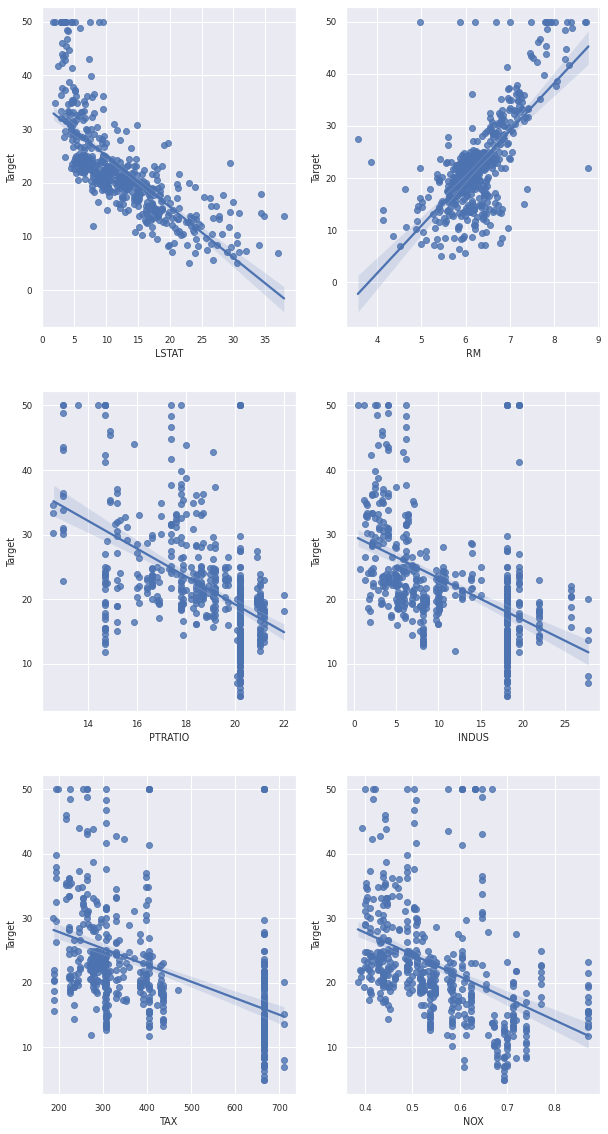

In [13]:
plt.figure(figsize = (10,20))
for idx, col in enumerate(plot_cols[1:]):
  ax1 = plt.subplot(3,2,idx+1)
  sns.regplot(x = col, y = plot_cols[0],data = plot_df, ax = ax1)

plt.show()

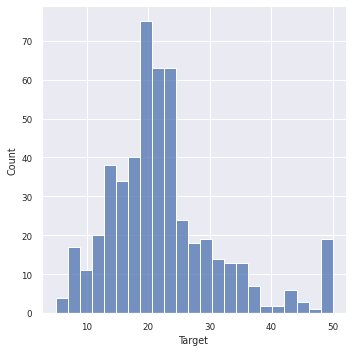

In [14]:
# Target 주택 가격의 데이터 분포
sns.displot(x = 'Target',kind = 'hist',data = df)
plt.show()

In [15]:
#데이터 전처리
#스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = df.iloc[:,:-1]
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)

df.iloc[:,:-1] = df_scaled[:,:]
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [16]:
#training, test set
from sklearn.model_selection import train_test_split
x_data = df.iloc[:,:-1]
y_data = df.loc[:,'Target']
x_train,x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                   test_size = 0.2,
                                                   shuffle = True,
                                                   random_state=12)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [17]:
mean = x_train.mean(axis = 0)
x_train -= mean
std = x_train.std()
x_train /= std

x_test -=mean
x_test /=std

In [18]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation = 'relu',
                         input_shape = (x_train.shape[1],)))
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss= 'mse',metrics = ['mae'])
  return model

In [26]:
k = 4
num_val_samples = len(x_train)//4
num_epochs = 100
all_scores = []
all_mae_history = []
for i in range(k):
  print('처리중인 폴드 #',i)
  val_data = x_train[i*num_val_samples:(i+1)*num_val_samples]
  val_targets = y_train[i*num_val_samples:(i+1)*num_val_samples]
  
  partial_train_data = np.concatenate(
      [x_train[:i*num_val_samples],
       x_train[(i+1)*num_val_samples:]], axis = 0)
    
  partial_train_targets = np.concatenate(
      [y_train[:i*num_val_samples],
       y_train[(i+1)*num_val_samples:]], axis = 0)
  
  model = build_model()
  history = model.fit(partial_train_data,partial_train_targets, epochs = num_epochs, batch_size = 1, verbose = 0)
  val_mse, val_mae = model.evaluate(val_data,val_targets,verbose = 0)
  all_scores.append(val_mae)
  mae_history = history.history['mae']
  all_mae_history.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [27]:
average_mae_history = [np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]

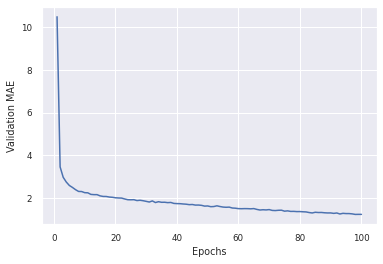

In [28]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [29]:
model = build_model()
model.fit(x_train, y_train, epochs = 80, batch_size = 16, verbose = 0)

In [31]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)
print(test_mae_score)

4/4 [==============================] - 0s 7ms/step - loss: 13.1631 - mae: 2.7097
2.7097389698028564


In [33]:
print(model.predict(x_test[30:40]))
print(y_test[30:40])

[[24.951502]
 [28.716925]
 [14.972824]
 [32.08924 ]
 [57.37567 ]
 [12.948694]
 [18.784857]
 [47.780598]
 [17.267132]
 [24.181376]]
101    26.5
85     26.6
391    23.2
227    31.6
257    50.0
401     7.2
11     18.9
195    50.0
149    15.4
1      21.6
Name: Target, dtype: float64


## **Regression**

In [35]:
#training, test set
from sklearn.model_selection import train_test_split
x_data=df.loc[:, ['LSTAT', 'RM']]
y_data = df.loc[:,'Target']
x_train,x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                   test_size = 0.2,
                                                   shuffle = True,
                                                   random_state=12)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 2) (404,)
(102, 2) (102,)


In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

print('회귀계수 (기울기) : ',np.round(lr.coef_,1))
print('상수항 (절편)',np.round(lr.intercept_,1))

회귀계수 (기울기) :  [-23.2  25.4]
상수항 (절편) 16.3


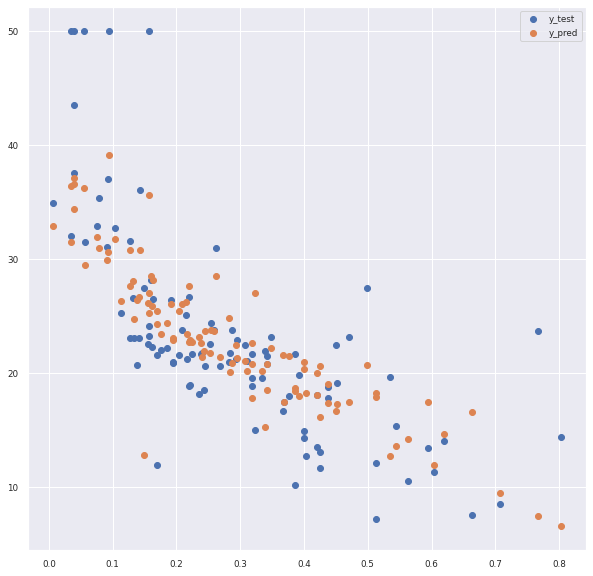

In [37]:
#예측값 저장
y_test_pred = lr.predict(x_test)

#예측값과 실제값의 분포
plt.figure(figsize = (10,10))
plt.scatter(x_test['LSTAT'],y_test, label = 'y_test')
plt.scatter(x_test['LSTAT'],y_test_pred,label = 'y_pred')
plt.legend(loc='best')
plt.show()

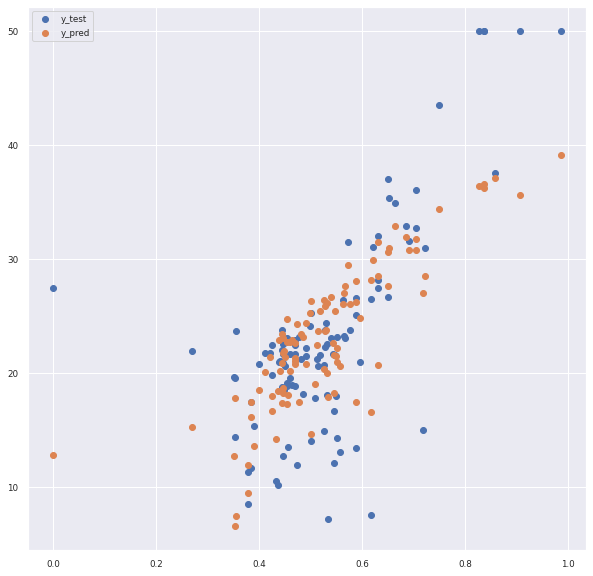

In [38]:
#예측값과 실제값의 분포
plt.figure(figsize = (10,10))
plt.scatter(x_test['RM'],y_test, label = 'y_test')
plt.scatter(x_test['RM'],y_test_pred,label = 'y_pred')
plt.legend(loc='best')
plt.show()

In [39]:
#성능 평가
from sklearn.metrics import mean_squared_error
y_train_pred=lr.predict(x_train)

train_mse=mean_squared_error(y_train, y_train_pred) #훈련 데이터의 평가 점수
print("Train MSE:%.4f" % train_mse)

test_mse=mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:30.8042
Test MSE:29.5065


In [40]:
print(y_test_pred[:20])
print(y_test[:20])

[26.42957262 18.23344254  9.44928535 26.20853947 28.55466001 21.08759553
 23.14400648 34.37118441 30.8220508  26.06321488 26.16435728 21.75615571
 23.4636742  21.34788168 31.01340038 36.57628087 19.01636818 25.27443488
 22.67524144 23.6778125 ]
334    20.7
394    12.7
404     8.5
236    25.1
307    28.2
86     22.5
14     18.2
268    43.5
304    36.1
314    23.8
329    22.6
205    22.6
67     22.0
6      22.9
281    35.4
283    50.0
356    17.8
201    24.1
357    21.7
94     20.6
Name: Target, dtype: float64
